In [69]:
'''
___OVERVIEW___
CODE FOR QUESTION 5 - HW 5

___SUMMARY___
Morphological Transformations
Find outline of the object using morphological transformations.

___AUTHOR___
Amirhossein Daraie — 9733023

___DATE___
6/June/2021
16/03/1400

'''

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [70]:
from IPython.core.display import display, HTML
display(HTML("""
<style>
#notebook-container {
    width: 100%
}

.code_cell {
   flex-direction: row !important;
}

.code_cell .input {
    width: 50%
}

.code_cell .output_wrapper {
    width: 50%
}
</style>
"""))

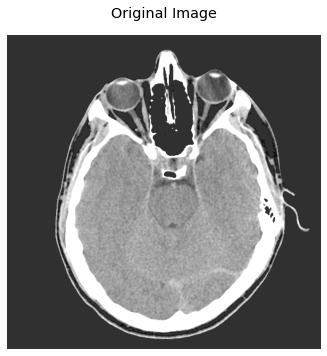

In [71]:
image = cv.imread("HeadCT.tif", flags=cv.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(figsize=(5,5))
st = fig.suptitle("Original Image", fontsize="x-large")
ax.imshow(image,vmin=image.min(),vmax=image.max(), cmap='gray')
ax.axis('off')
plt.tight_layout()
plt.show()

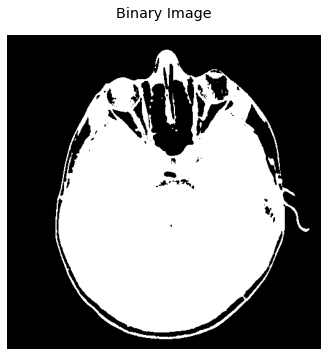

In [72]:
_,thresh = cv.threshold(image,100,255,cv.THRESH_BINARY)

fig, ax = plt.subplots(figsize=(5,5))
st = fig.suptitle("Binary Image", fontsize="x-large")
ax.imshow(thresh,vmin=thresh.min(),vmax=thresh.max(), cmap='gray')
ax.axis('off')
plt.tight_layout()
plt.show()

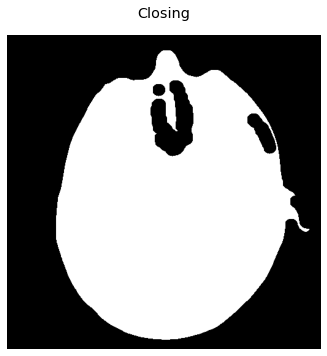

In [73]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(20,20))
closing = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)

fig, ax = plt.subplots(figsize=(5,5))
st = fig.suptitle("Closing", fontsize="x-large")
ax.imshow(closing,vmin=closing.min(),vmax=closing.max(), cmap='gray')
ax.axis('off')
plt.tight_layout()
plt.show()

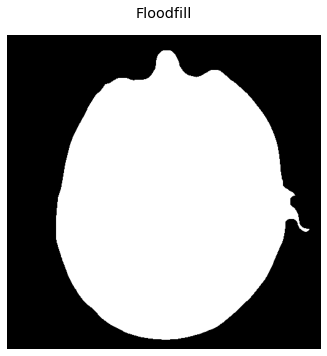

In [77]:
def hole_filling(image, start_point):
    im_floodfill = image.copy()
    h, w = closing.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)
    cv.floodFill(im_floodfill, mask, start_point, 255);
    im_floodfill_inv = cv.bitwise_not(im_floodfill)
    im_out = closing | im_floodfill_inv
    return im_out

im_out = hole_filling(closing, (0,0))

fig, ax = plt.subplots(figsize=(5,5))
st = fig.suptitle("Floodfill", fontsize="x-large")
ax.imshow(im_out,vmin=im_out.min(),vmax=im_out.max(), cmap='gray')
ax.axis('off')
plt.tight_layout()
plt.show()

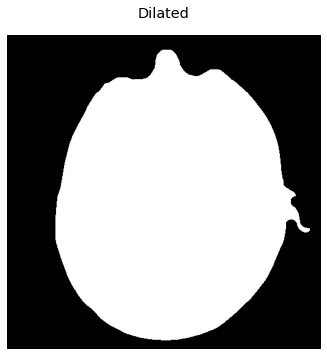

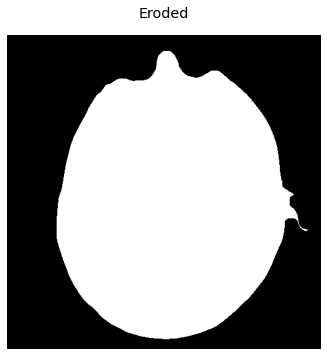

In [78]:
kernel = np.ones((3,3),np.uint8)
dilation = cv.dilate(im_out,kernel,iterations = 1)

fig, ax = plt.subplots(figsize=(5,5))
st = fig.suptitle("Dilated", fontsize="x-large")
ax.imshow(dilation,vmin=dilation.min(),vmax=dilation.max(), cmap='gray')
ax.axis('off')
plt.tight_layout()
plt.show()


kernel = np.ones((3,3),np.uint8)
erosion = cv.erode(im_out,kernel,iterations = 1)

fig, ax = plt.subplots(figsize=(5,5))
st = fig.suptitle("Eroded", fontsize="x-large")
ax.imshow(erosion,vmin=erosion.min(),vmax=erosion.max(), cmap='gray')
ax.axis('off')
plt.tight_layout()
plt.show()

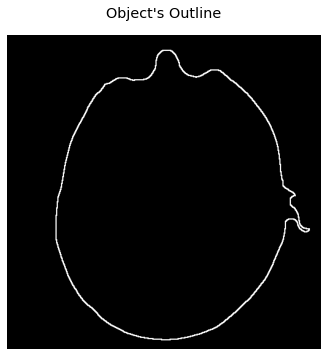

In [79]:
object_outline = dilation - erosion

fig, ax = plt.subplots(figsize=(5,5))
st = fig.suptitle("Object's Outline", fontsize="x-large")
ax.imshow(object_outline,vmin=object_outline.min(),\
          vmax=object_outline.max(), cmap='gray')
ax.axis('off')
plt.tight_layout()
plt.show()